# Density

In [1]:
## Import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from  statsmodels.distributions.empirical_distribution import ECDF

## Cumulative Density Curves

In [1]:
# from main import save
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/DensityCDF.dta")

In [2]:
mean_revenue = data.groupby(['post']).mean().revenue
data['mean_revenue'] = np.where(data.post == 0, mean_revenue[0], mean_revenue[1])
data.sort_values(by = 'revenue', inplace = True)

C:\Users\Jhon\AppData\Local\Temp\ipykernel_2820\2613227059.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['revenue1'] = ecdf0(data0['revenue'])
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2820\2613227059.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['revenue1'] = ecdf1(data1['revenue'])


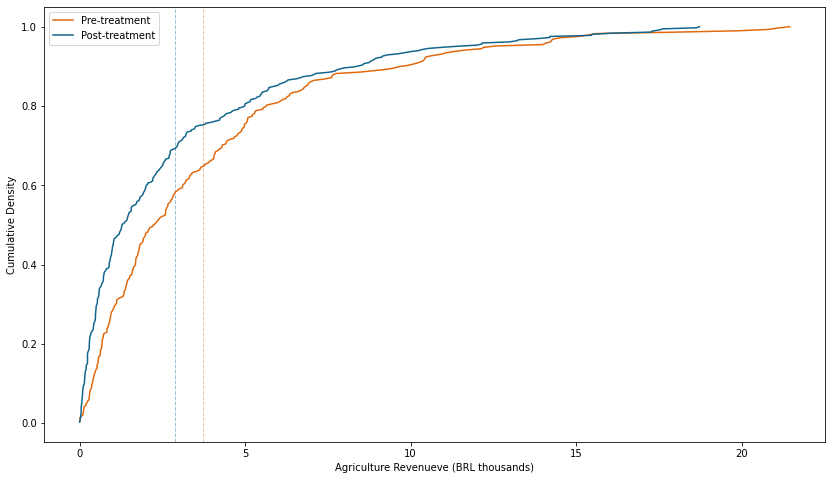

In [3]:

fig = plt.figure()
ax = fig.axvline

data0 = data[data.post == 0]
data1 = data[data.post == 1]

ecdf0 =  ECDF(data0.revenue)
ecdf1 =  ECDF(data1.revenue)

colors = ["#e0680d", "#12658c"]

data0['revenue1'] = ecdf0(data0['revenue'])
data1['revenue1'] = ecdf1(data1['revenue'])

# ax.spines('top').set_visible(True)
base = plt.figure(figsize=(14, 8), facecolor="white")

plt.axvline(mean_revenue[1], linestyle = "--", color = colors[0], alpha = .4, lw = 1)
plt.axvline(mean_revenue[0], linestyle = "--", color = colors[1], alpha = .4, lw = 1)
plt.plot("revenue", "revenue1", data = data1, color = colors[0],label = "Pre-treatment")
plt.plot("revenue", "revenue1", data = data0, color = colors[1],label = "Post-treatment")
plt.legend()
plt.xlabel("Agriculture Revenueve (BRL thousands)")
plt.ylabel("Cumulative Density")
plt.savefig("../figs/02density_01.png", dpi = 400)

## Density

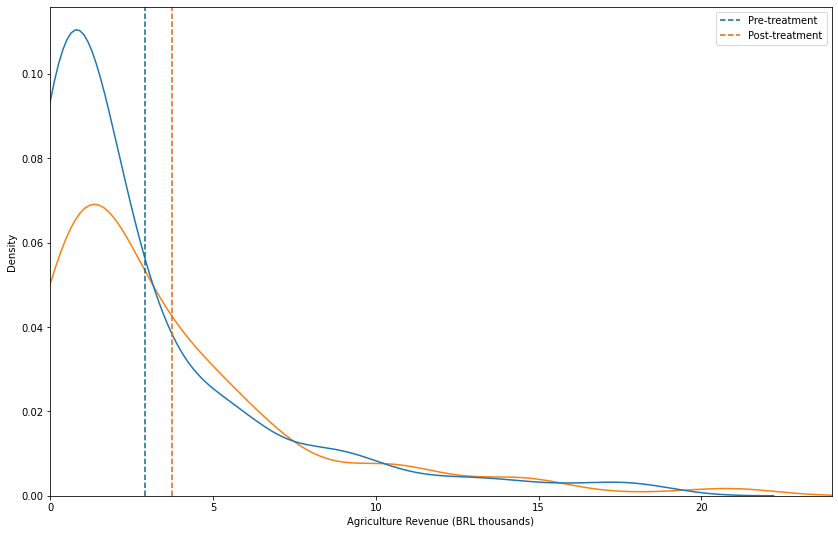

In [4]:

plt.figure(figsize=(14, 9), facecolor="white")

sns.kdeplot(data=data, x="revenue", hue = "post", legend = True)
plt.axvline(mean_revenue[0], linestyle = "--", color = colors[1], label = "Pre-treatment")
plt.axvline(mean_revenue[1], linestyle = "--", color = colors[0], label = "Post-treatment")
plt.legend()
plt.xlabel("Agriculture Revenue (BRL thousands)")
# plt.legend(handles, ['Pre-treatment', 'Post-treatment'], title='Group')
plt.xlim(0, 24)
plt.savefig("../figs/02density_02.png", dpi = 500)

# Groups

In [5]:
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/evaluation.dta")

In [6]:
features = ["eligible", "round", "treatment_locality", "health_expenditures"]
data1 = data[features][data.eligible == 1]
data1['group'] =  round(data1['round'] / 10 + data1.treatment_locality, 2)

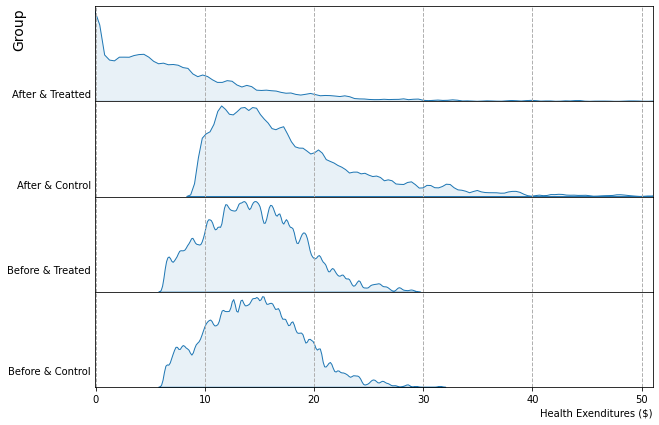

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, facecolor="white", figsize=(10, 7))
# fig.subplots_adjust(hspace = 1)
fig.subplots_adjust(hspace = 0)
ax1.set_xlim(-.1, 51)
ax2.set_xlim(-.1, 51)
ax3.set_xlim(-.1, 51)
ax4.set_xlim(-.1, 51)


ax1.tick_params(axis = 'x', colors = "white")
ax2.tick_params(axis = 'x', colors = "white")
ax3.tick_params(axis = 'x', colors = "white")
# ax4.tick_params(axis = 'x', colors = "black")

ax1.axes.get_yaxis().set_ticks([])
ax2.axes.get_yaxis().set_ticks([])
ax3.axes.get_yaxis().set_ticks([])
ax4.axes.get_yaxis().set_ticks([])

ax1.xaxis.grid(linestyle = "--", linewidth = 1)
ax2.xaxis.grid(linestyle = "--", linewidth = 1)
ax3.xaxis.grid(linestyle = "--", linewidth = 1)
ax4.xaxis.grid(linestyle = "--", linewidth = 1)

sns.kdeplot(data = data1[data1.group == 1.1], x = "health_expenditures", fill = True, alpha = .1, bw_adjust = .2, ax = ax1)
sns.kdeplot(data = data1[data1.group == 0.1], x = "health_expenditures", fill = True, alpha = .1, bw_adjust = .2, ax = ax2)
sns.kdeplot(data = data1[data1.group == 1.0], x = "health_expenditures", fill = True, alpha = .1, bw_adjust = .2, ax = ax3)
sns.kdeplot(data = data1[data1.group == 0.0], x = "health_expenditures", fill = True, alpha = .1, bw_adjust = .2, ax = ax4)

fig.text(.03, .8, "Group", ha = "right", rotation = "vertical", size = 14)
fig.text(.12, .70, "After & Treatted", ha = "right")
fig.text(.12, .52, "After & Control", ha = "right")
fig.text(.12, .35, "Before & Treated", ha = "right")
fig.text(.12, .15, "Before & Control", ha = "right")

plt.xlabel("Health Exenditures ($)", loc = "right" )
plt.rc("axes", edgecolor = 'white')
plt.savefig("../figs/02density_03.png")

## Rounds

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/replicationJDE.csv")

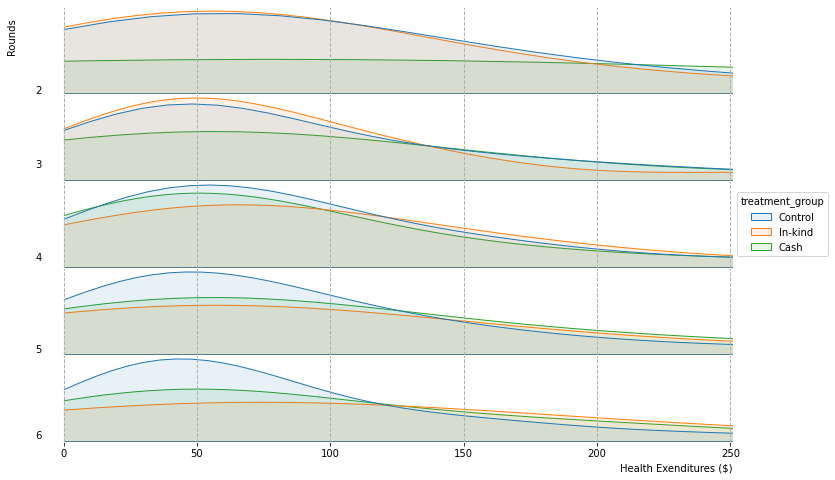

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, facecolor="white", figsize = (12, 8))
# sns.set(style="darkgrid")
# fig.subplots_adjust(hspace = 1)
fig.subplots_adjust(hspace = 0)
ax1.set_xlim(-.1, 251)
ax2.set_xlim(-.1, 251)
ax3.set_xlim(-.1, 251)
ax4.set_xlim(-.1, 251)
ax5.set_xlim(-.1, 251)


ax1.tick_params(axis = 'x', colors = "white")
ax2.tick_params(axis = 'x', colors = "white")
ax3.tick_params(axis = 'x', colors = "white")
ax4.tick_params(axis = 'x', colors = "white")

ax1.axes.get_yaxis().set_ticks([])
ax2.axes.get_yaxis().set_ticks([])
ax3.axes.get_yaxis().set_ticks([])
ax4.axes.get_yaxis().set_ticks([])
ax5.axes.get_yaxis().set_ticks([])

ax1.xaxis.grid(linestyle = "--", linewidth = 1)
ax2.xaxis.grid(linestyle = "--", linewidth = 1)
ax3.xaxis.grid(linestyle = "--", linewidth = 1)
ax4.xaxis.grid(linestyle = "--", linewidth = 1)
ax5.xaxis.grid(linestyle = "--", linewidth = 1)

sns.kdeplot(data = data[data.wave == 2], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1,  ax = ax1, legend = False)
sns.kdeplot(data = data[data.wave == 3], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax2, legend = False)
sns.kdeplot(data = data[data.wave == 4], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax3, legend = True)
sns.kdeplot(data = data[data.wave == 5], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax4, legend = False)
sns.kdeplot(data = data[data.wave == 6], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax5, legend = False)
# ax3.legend(handles, title='Stat.ind.')

fig.text(.06, .8, "Rounds", ha = "left", rotation = "vertical")
fig.text(.1, .73, "2", ha = "right")
fig.text(.1, .60, "3", ha = "right")
fig.text(.1, .44, "4", ha = "right")
fig.text(.1, .28, "5", ha = "right")
fig.text(.1, .13, "6", ha = "right")


# ax5.set_axis_off()
plt.xlabel("Health Exenditures ($)", loc = "right" )

# fig.legend(ax1.get_legend().get_lines(),
#            [t.get_text() for t in ax1.get_legend().get_texts()],
#            title='variable', loc = (.85, .5))
# sns.kdeplot(data = data[data.wave == 2], x = "realfinalprofit", hue = "treatment_group", fill = True , alpha = .1, bw_adjust = .2, ax = ax1, legend = True)
# ax1.get_legend().remove()
# legend = ax3.get_legend()
# handles = legend.legendHandles
# legend.remove()
plt.rc("axes", edgecolor = 'white')
sns.move_legend(ax3, loc='right', ncol=1, bbox_to_anchor=(1.15, .5))
plt.savefig("../figs/02density_04.png", dpi = 500)
# plt.legend(title = "ads")
# plt.rc("legend", loc = "center left")
# ax3.legend(loc = "upper right", title = "Group")

## Count binwidth

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/desity_data.csv")

data = data.dropna(subset = ['theta_mle', 'roster_6a8'])
data['score'] = data.theta_mle - min(data.theta_mle)
data['bach'] =  data['roster_6a8']> 4
data.head(3)

# data.info()


,location_type,FACILITY_ID,DOCTOR_ID,facility,facilitycode,roster_6a8,theta_mle,score,bach
0,1,10101,1010101,NaN,1,4.0,1.754790,6.751990,False
1,1,10202,1020204,NaN,2,4.0,0.161093,5.158293,False
2,1,10303,1030301,NaN,3,4.0,-3.496340,1.500860,False


In [15]:
data.score
# sns.histplot(data = data[data.bach == 1], x = "score", binwidth = .2)
# ax = plt.gca()
# line = ax.get_lines()
import numpy as np
bins_d = np.arange(-.00, 20,0.1) 
bins_d 
# df['score1'] = 
data["bins"] = pd.cut(data.score, bins_d)
# data
data['count'] =  data.groupby(['bach', 'bins'])['score'].transform('size')

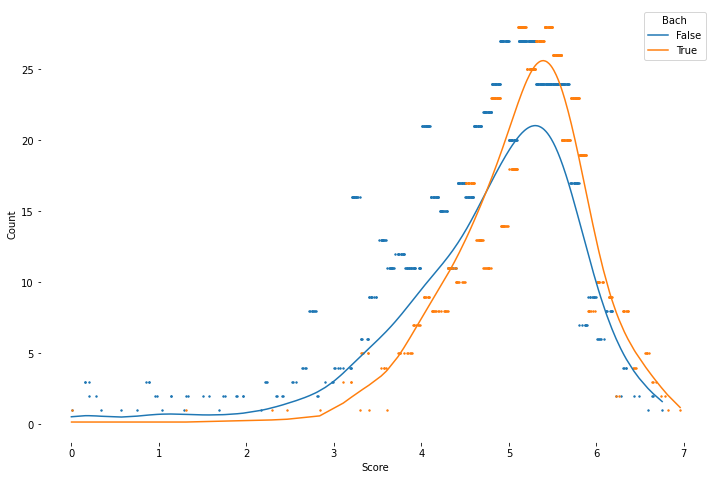

In [16]:
from scipy.stats import gaussian_kde

data = data.sort_values('score')
data0 = data[data.bach == 0]
data1 = data[data.bach == 1]

density1 = gaussian_kde(data1.score)
density0 = gaussian_kde(data.score)
# ys0 = 

# sns.scatterplot (x = "score", y = "count", data = data, hue = "bach", alpha = .2, legend = True, sizes = (43, 43))
plt.figure(figsize=(12, 8), facecolor="white")
plt.scatter (x = "score", y = "count", data = data0, s = 2, label = "")
plt.scatter (x = "score", y = "count", data = data1, s = 2, label = "")
plt.plot(data0.score, density0(data0.score) * 45, label = "False")
plt.plot(data1.score, density1(data1.score) * 45, label = "True")
plt.xlabel("Score")
plt.ylabel("Count")
plt.rc("axes", edgecolor = 'white')
plt.legend(title = "Bach")
plt.savefig("../figs/02density_05.png")